# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: November 2, by 5:59pm**


## The MovieLens data sets


http://grouplens.org/datasets/movielens/



In [ ]:
from IPython.lib.display import YouTubeVideo

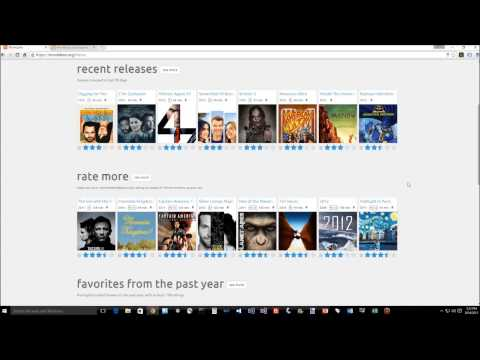

In [ ]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:**

Please EDIT this cell and add the names of all the team members in your team:

    1. member 1
    
    2. member 2
    
    3. ...

 **Give your group a name**. For example: ***Data Detectives***

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:**
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!




# Problem 1 (20 points total):

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [ ]:
import csv

with open(r"C:\Users\rutuj\Downloads\ml-1m\ml-1m\users.dat", 'r') as dat_file:
    with open('users.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in dat_file:
            row = [value.strip() for value in row.replace('::', ',').split(',')]
            csv_writer.writerow(row)

In [ ]:
with open(r"C:\Users\rutuj\Downloads\ml-1m\ml-1m\movies.dat", 'r') as dat_file:
    with open('movies_new.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in dat_file:
            # Replace both '::' and '|' with a comma and then split by a comma
            row = [value.strip() for value in row.replace(',', ' ').replace('::',',').split(',')]

            csv_writer.writerow(row)


In [ ]:
with open(r"C:\Users\rutuj\Downloads\ml-1m\ml-1m\ratings.dat", 'r') as dat_file:
    with open('ratings.csv', 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        for row in dat_file:
            # Replace both '::' and '|' with a comma and then split by a comma
            row = [value.strip() for value in row.replace('::', ',').split(',')]
            csv_writer.writerow(row)


In [ ]:
import pandas as pd
users= pd.read_csv(r"C:\Users\rutuj\Downloads\users.csv")


In [ ]:
movies= pd.read_csv(r"C:\Users\rutuj\Downloads\movies.csv" ,encoding='latin-1')


In [ ]:
ratings=pd.read_csv(r"C:\Users\rutuj\Downloads\ratings.csv" )
ratings

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [ ]:
column_names = ['MovieID', 'Title', 'Genres']
movies.columns = column_names
movies

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [ ]:
column_names = ['UserID', 'Gender', 'Age','Occupation','Zip Code']
users.columns = column_names
users

,UserID,Gender,Age,Occupation,Zip Code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [ ]:
column_names = ['UserID','MovieID','Rating','Timestamp']
ratings.columns = column_names
ratings

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [ ]:
merged_data = pd.merge(ratings, users, on='UserID', how='inner')
merged_data = pd.merge(merged_data, movies, on='MovieID', how='inner')

In [ ]:
merged_data

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,Title,Genres
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance
3,18,1357,5,978156876,F,18,3,95825,Shine (1996),Drama|Romance
4,33,1357,4,978109488,M,45,3,55421,Shine (1996),Drama|Romance
...,...,...,...,...,...,...,...,...,...,...
998075,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
998076,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
998077,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
998078,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
!pip install tables

In [ ]:
merged_data.to_hdf('movielens.h5', key='merged_data', mode='w')

In [ ]:
movielens_df = pd.read_hdf(r"C:\Users\rutuj\Downloads\movielens.h5", key='merged_data')
movielens_df.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Gender', 'Age',
       'Occupation', 'Zip Code', 'Title', 'Genres'],
      dtype='object')

In [ ]:


import pandas as pd
import numpy as np

# Load the data from the HDF5 file
movielens_df = pd.read_hdf('/content/movielens.h5')

# Task 1: Movies with an average rating over 4.5
average_rating = movielens_df.groupby('Title')['Rating'].mean()
movies_above_45 = average_rating[average_rating > 4.5].count()
print(f"Movies with average rating over 4.5: {movies_above_45}")

# Task 2: Movies with an average rating over 4.5 among men and women
men_average_rating = movielens_df[movielens_df['Gender'] == 'M'].groupby('Title')['Rating'].mean()
men_movies_above_45 = men_average_rating[men_average_rating > 4.5].count()

women_average_rating = movielens_df[movielens_df['Gender'] == 'F'].groupby('Title')['Rating'].mean()
women_movies_above_45 = women_average_rating[women_average_rating > 4.5].count()

print(f"Movies with average rating over 4.5 among men: {men_movies_above_45}")
print(f"Movies with average rating over 4.5 among women: {women_movies_above_45}")

# Task 3: Movies with a median rating over 4.5 among men and women over age 30
men_median_rating = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Age'] > 30)].groupby('Title')['Rating'].median()
men_movies_median_above_45 = men_median_rating[men_median_rating > 4.5].count()

women_median_rating = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Age'] > 30)].groupby('Title')['Rating'].median()
women_movies_median_above_45 = women_median_rating[women_median_rating > 4.5].count()

print(f"Movies with median rating over 4.5 among men over age 30: {men_movies_median_above_45}")
print(f"Movies with median rating over 4.5 among women over age 30: {women_movies_median_above_45}")

# Task 4: Ten most popular movies (assuming popularity is determined by the number of ratings)
popularity = movielens_df.groupby('Title').size()
popular_movies = popularity.sort_values(ascending=False).head(10)
print("Ten most popular movies:")
print(popular_movies)

# Task 5: Conjectures
# Conjecture: Older people (age above 30) are harder to please (lower average ratings)
older_people_ratings = movielens_df[movielens_df['Age'] > 30]['Rating'].mean()
younger_people_ratings = movielens_df[movielens_df['Age'] <= 30]['Rating'].mean()

print(f"Average rating by people over 30: {older_people_ratings:.2f}")
print(f"Average rating by people 30 and under: {younger_people_ratings:.2f}")

if older_people_ratings < younger_people_ratings:
    print("Conjecture is true: Older people are harder to please.")
else:
    print("Conjecture is false: Older people are not necessarily harder to please.")


Movies with average rating over 4.5: 21
Movies with average rating over 4.5 among men: 23
Movies with average rating over 4.5 among women: 51
Movies with median rating over 4.5 among men over age 30: 86
Movies with median rating over 4.5 among women over age 30: 149
Ten most popular movies:
Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2990
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2652
Terminator 2: Judgment Day (1991)                        2649
Matrix  The (1999)                                       2590
Back to the Future (1985)                                2582
Silence of the Lambs  The (1991)                         2578
dtype: int64
Average rating by people over 30: 3.65
Average rating by people 30 an

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movielens_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,Title,Genres
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance
3,18,1357,5,978156876,F,18,3,95825,Shine (1996),Drama|Romance
4,33,1357,4,978109488,M,45,3,55421,Shine (1996),Drama|Romance


In [ ]:
movielens_df.MovieID.nunique()

3705

<Axes: xlabel='Rating', ylabel='Count'>

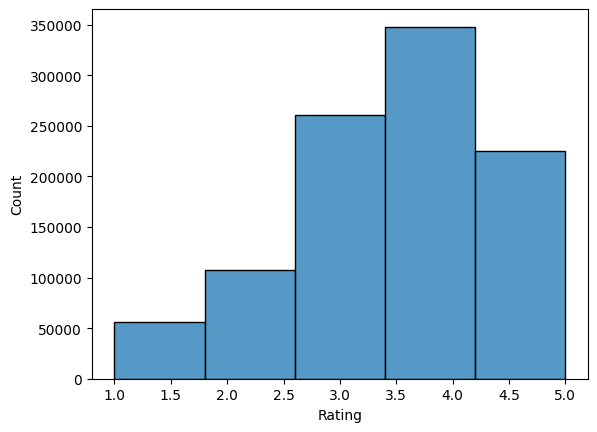

In [ ]:
#(2 points) Plot a histogram of the ratings of all movies.

sns.histplot(data = movielens_df, x = 'Rating', binwidth=0.8)

 **Plot a histogram of the number of ratings each movie recieved.**

In [ ]:
Count = movielens_df.groupby(['MovieID']).count()
Count

,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip Code,Title,Genres
MovieID,,,,,,,,,
2,701,701,701,701,701,701,701,701,701
3,478,478,478,478,478,478,478,478,478
4,170,170,170,170,170,170,170,170,170
5,296,296,296,296,296,296,296,296,296
6,940,940,940,940,940,940,940,940,940
...,...,...,...,...,...,...,...,...,...
3948,862,862,862,862,862,862,862,862,862
3949,304,304,304,304,304,304,304,304,304
3950,54,54,54,54,54,54,54,54,54


<Axes: xlabel='Rating', ylabel='Count'>

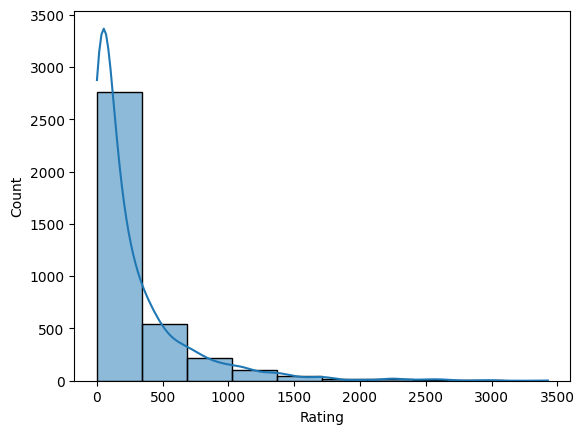

In [ ]:
sns.histplot(Count['Rating'],bins = 10, kde = True)

**Plot a histogram of the average rating for each movie.**

In [ ]:
Average = movielens_df.groupby(['MovieID']).mean()
Average

<ipython-input-11-8681069d48f1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Average = movielens_df.groupby(['MovieID']).mean()


,UserID,Rating,Timestamp,Age,Occupation
MovieID,,,,,
2,3027.977175,3.201141,9.717322e+08,27.800285,7.680456
3,2632.156904,3.016736,9.734544e+08,29.276151,7.826360
4,3268.841176,2.729412,9.716206e+08,27.788235,6.752941
5,3143.152027,3.006757,9.718301e+08,27.425676,7.506757
6,3029.761702,3.878723,9.712302e+08,27.729787,8.392553
...,...,...,...,...,...
3948,2063.107889,3.635731,9.822191e+08,27.737819,8.305104
3949,2289.046053,4.115132,9.937587e+08,26.203947,7.578947
3950,2123.370370,3.666667,9.970516e+08,27.851852,7.407407


<Axes: xlabel='Rating', ylabel='Count'>

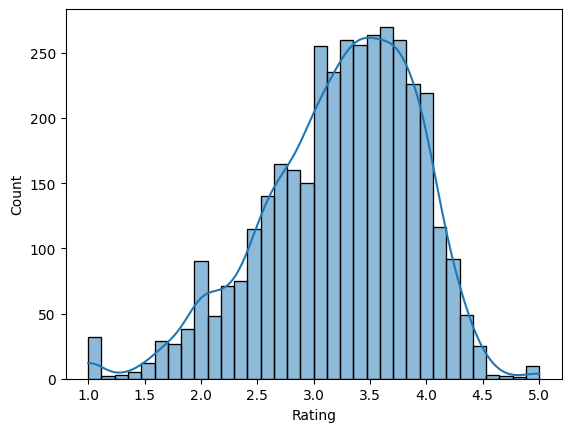

In [ ]:
sns.histplot(Average['Rating'], kde = True)

**(6 points) Plot a histogram of the average rating for movies which are rated more than 100 times.
What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
Which highly rated movies would you trust are actually good? Those rated more than 100 times or those rated less than 100 times?**

In [ ]:
list_great_100 = []
no_of_val = [movielens_df.MovieID.value_counts(sort = False)]
print(type(no_of_val[0]))
x = no_of_val[0].iloc[:].values
y = no_of_val[0].iloc[:].index

for (i,j) in zip(x,y):
    if i > 100:
        list_great_100.append(j)

<class 'pandas.core.series.Series'>


In [ ]:
new_movielens = movielens_df
new_movielens.shape

(998080, 10)

In [ ]:
for i in range((new_movielens.shape[0])):
    if i in new_movielens.index:
        if new_movielens.MovieID[i] not in list_great_100:
            new_movielens.drop(i, axis = 0, inplace = True)
#         print(new_movielens.index[i])

In [ ]:
new_movielens.shape

(938838, 10)

In [ ]:
new_Average = new_movielens.groupby(['MovieID']).mean()
new_Average

C:\Users\Atharva Kulkarni\AppData\Local\Temp\ipykernel_20240\652028949.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_Average = new_movielens.groupby(['MovieID']).mean()


,UserID,Rating,Timestamp,Age,Occupation
MovieID,,,,,
2,3027.977175,3.201141,9.717322e+08,27.800285,7.680456
3,2632.156904,3.016736,9.734544e+08,29.276151,7.826360
4,3268.841176,2.729412,9.716206e+08,27.788235,6.752941
5,3143.152027,3.006757,9.718301e+08,27.425676,7.506757
6,3029.761702,3.878723,9.712302e+08,27.729787,8.392553
...,...,...,...,...,...
3936,2014.062500,3.723214,9.758834e+08,37.928571,8.982143
3937,1902.370370,2.940741,9.761836e+08,31.874074,8.800000
3948,2063.107889,3.635731,9.822191e+08,27.737819,8.305104


<Axes: xlabel='Rating', ylabel='Count'>

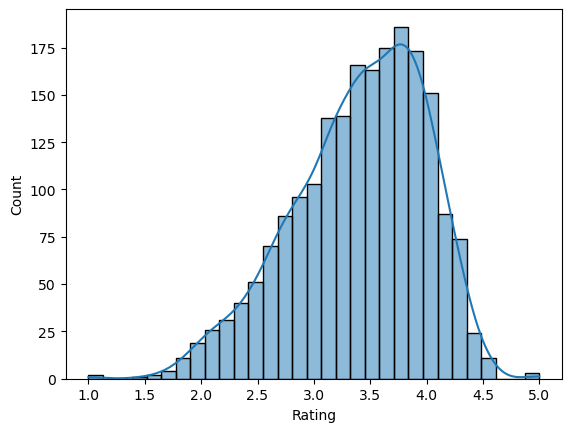

In [ ]:
sns.histplot(new_Average['Rating'], kde = True)

**Conjectures**

In [ ]:
avg_children = movielens_df[(movielens_df['Age'] >= 1) & (movielens_df['Age'] <= 10)].groupby('MovieID')["Rating"].mean()
avg_children

MovieID
2       3.388889
3       3.500000
4       3.333333
5       3.400000
6       3.904762
          ...   
3948    4.160000
3949    4.615385
3950    4.000000
3951    3.000000
3952    3.833333
Name: Rating, Length: 2648, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

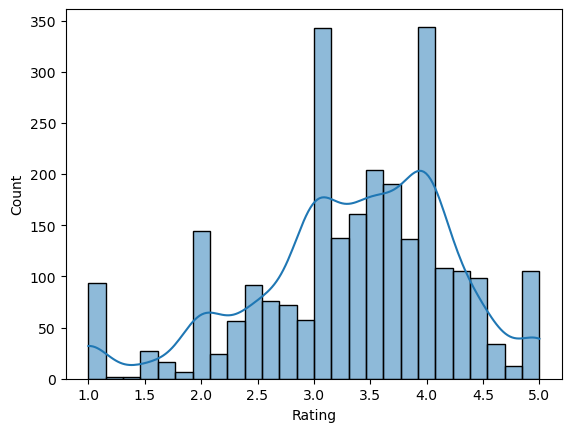

In [ ]:
sns.histplot(avg_children, kde = True)

In [ ]:
avg_rating_men = movielens_df[(movielens_df['Gender'] == 'M')].groupby('MovieID')["Rating"].mean()
avg_rating_men

MovieID
2       3.175238
3       2.994152
4       2.482353
5       2.888298
6       3.909988
          ...   
3948    3.641838
3949    4.174107
3950    3.681818
3951    4.043478
3952    3.787986
Name: Rating, Length: 3670, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

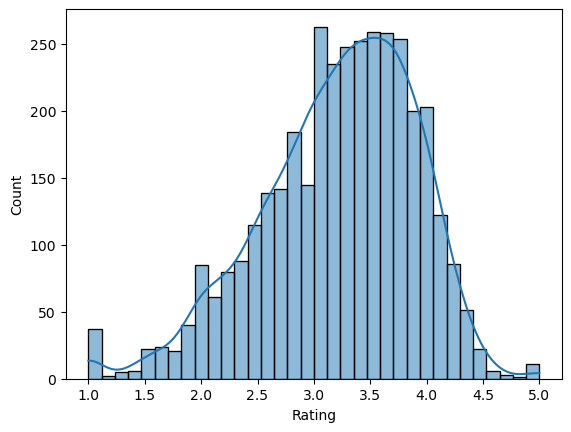

In [ ]:
sns.histplot(avg_rating_men, kde = True)

In [ ]:
avg_rating_women = movielens_df[(movielens_df['Gender'] == 'F')].groupby('MovieID')["Rating"].mean()
avg_rating_women

MovieID
2       3.278409
3       3.073529
4       2.976471
5       3.212963
6       3.682171
          ...   
3948    3.619048
3949    3.950000
3950    3.600000
3951    3.705882
3952    3.761905
Name: Rating, Length: 3480, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

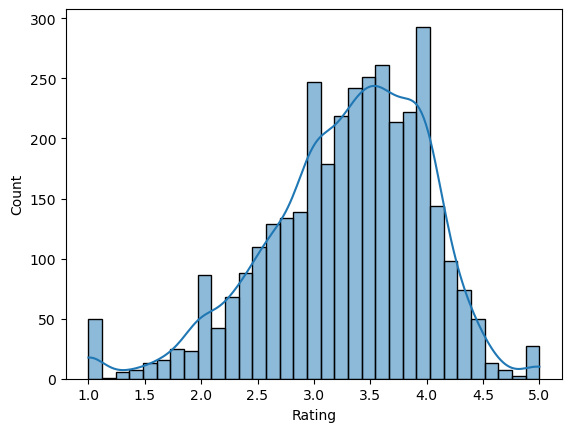

In [ ]:
sns.histplot(avg_rating_women, kde = True)

In [ ]:
avg_rating_men_30 = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Age'] >= 30)].groupby('MovieID')["Rating"].mean()
avg_rating_men_30

MovieID
2       3.355191
3       2.873950
4       2.800000
5       2.901639
6       3.736170
          ...   
3948    3.502488
3949    4.192308
3950    3.818182
3951    3.916667
3952    3.915966
Name: Rating, Length: 3549, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

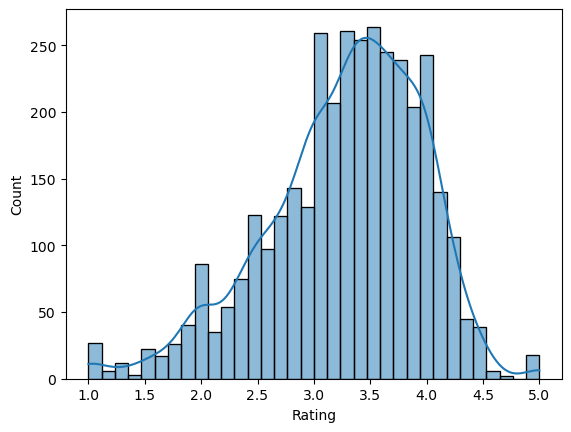

In [ ]:
sns.histplot(avg_rating_men_30, kde = True)

In [ ]:
avg_rating_women_30 = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Age'] >= 30)].groupby('MovieID')["Rating"].mean()
avg_rating_women_30

MovieID
2       3.373134
3       3.172414
4       2.952381
5       3.473684
6       3.595745
          ...   
3948    3.558140
3949    3.807692
3950    3.571429
3951    3.916667
3952    3.846154
Name: Rating, Length: 3278, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

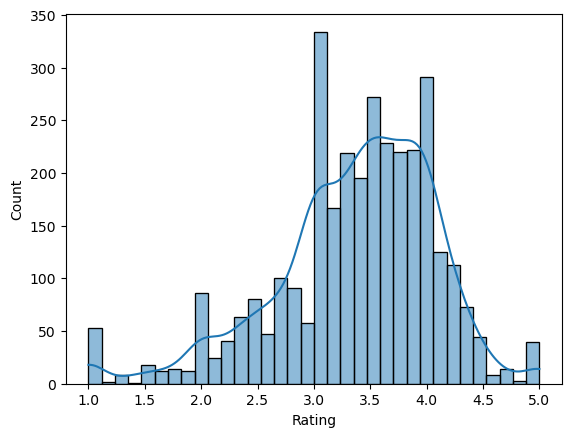

In [ ]:
sns.histplot(avg_rating_women_30, kde = True)

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean

rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

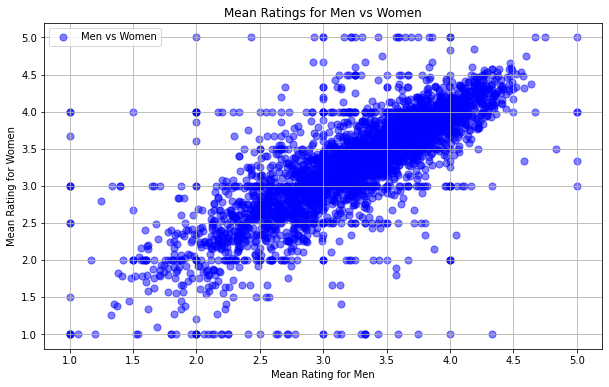

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Group the data by 'MovieID' and 'Gender' and calculate the mean rating
mean_ratings = movielens_df.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings['M'], mean_ratings['F'], alpha=0.5, marker='o', s=50, c='b', label='Men vs Women')
plt.title('Mean Ratings for Men vs Women')
plt.xlabel('Mean Rating for Men')
plt.ylabel('Mean Rating for Women')
plt.grid(True)
plt.legend(loc='best')
plt.show()


**Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times**

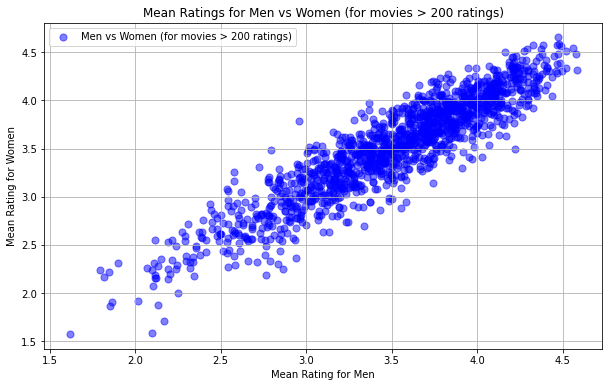

In [ ]:
# Group the data by 'MovieID' and 'Gender' and calculate the mean rating
mean_ratings = movielens_df.groupby(['MovieID', 'Gender'])['Rating'].mean().unstack()

# Calculate the count of ratings for each movie
ratings_count = movielens_df.groupby('MovieID')['Rating'].count()

# Filter movies with more than 200 ratings
popular_movies = ratings_count[ratings_count > 200].index

# Filter the mean ratings for popular movies
mean_ratings = mean_ratings.loc[popular_movies]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_ratings['M'], mean_ratings['F'], alpha=0.5, marker='o', s=50, c='b', label='Men vs Women (for movies > 200 ratings)')
plt.title('Mean Ratings for Men vs Women (for movies > 200 ratings)')
plt.xlabel('Mean Rating for Men')
plt.ylabel('Mean Rating for Women')
plt.grid(True)
plt.legend(loc='best')
plt.show()

**Compute the correlation coefficent between the ratings of men and women.**

In [ ]:
avg_rating_men = movielens_df[(movielens_df['Gender'] == 'M')].groupby('MovieID')["Rating"].mean()

In [ ]:
avg_rating_women = movielens_df[(movielens_df['Gender'] == 'F')].groupby('MovieID')["Rating"].mean()

In [ ]:
Corr_coef = avg_rating_men.corr(avg_rating_women)
Corr_coef

0.7630757635162321

**Are the ratings similiar or not? Support your answer with data!**

The ratings of men and women are similar as they have a strong positive correlation coefficient of 0.76

**Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
For example, are men and women more similar when they are younger or older?**

In [ ]:
avg_rating_men_30 = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Age'] >= 30)].groupby('MovieID')["Rating"].mean()
avg_rating_men_above_30 = avg_rating_men_30 [:3279]

In [ ]:
avg_rating_women_above_30 = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Age'] >= 30)].groupby('MovieID')["Rating"].mean()


In [ ]:
Corr_coef = avg_rating_men_above_30.corr(avg_rating_women_above_30)
Corr_coef

0.6991563653479013

In [ ]:
avg_rating_men_below_30 = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Age'] < 30)].groupby('MovieID')["Rating"].mean()
avg_rating_men_below_30 = avg_rating_men_below_30[:3279]

In [ ]:
avg_rating_women_below_30 = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Age'] <30)].groupby('MovieID')["Rating"].mean()


In [ ]:
Corr_coef = avg_rating_men_below_30.corr(avg_rating_women_below_30)
Corr_coef

0.711781740578392

Thus we can observe that the correlation coefficient of ratings of men and women below thirthy is higher than that of those above 30. So younger males and females have more similar ratings than the older ones

OWN Conjecture

comparing the avg ratings of men and women based on genres and calculating the correlation coeffiecient.


High Positive Correlation: If there's a high positive correlation between the ratings given by both genders for a specific type or genre of movies, it suggests a strong relationship. In such cases, the rating given by one gender might reasonably predict the rating given by the other gender. For instance, if men and women consistently give similar ratings to action movies, it might be possible to predict one gender's rating based on the other's.



In [ ]:
avg_rating_men_drama = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Genres'].str.contains('Drama', case=False))].groupby('MovieID')["Rating"].mean()


In [ ]:
avg_rating_women_drama = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Genres'].str.contains('Drama', case=False))].groupby('MovieID')["Rating"].mean()


In [ ]:
avg_rating_men_comedy = movielens_df[(movielens_df['Gender'] == 'M') & (movielens_df['Genres'].str.contains('Comedy', case=False))].groupby('MovieID')["Rating"].mean()


In [ ]:
avg_rating_women_comedy = movielens_df[(movielens_df['Gender'] == 'F') & (movielens_df['Genres'].str.contains('Comedy', case=False))].groupby('MovieID')["Rating"].mean()


In [ ]:
Corr_coef = avg_rating_men_drama.corr(avg_rating_women_drama)
Corr_coef

0.6364379184182789

In [ ]:
Corr_coef = avg_rating_men_comedy.corr(avg_rating_women_comedy)
Corr_coef

0.7975512312822656

Men and women have more similar ratings for Comedy genre as compared to the Drama genre.

Correlation coefficient for drama movies **(0.6364)**: This value suggests a moderately positive correlation between the average ratings given by men and women for drama movies. A correlation of 0.6364 indicates that there's a discernible, but not extremely strong, positive relationship between how men and women rate drama movies. As the average ratings by men tend to increase, there is a tendency for the average ratings by women to increase as well, but not in a perfectly linear manner. This suggests that there is a moderate level of agreement or consistency in how both genders rate drama films.

Correlation coefficient for comedy movies **(0.7976)**: This value indicates a strong positive correlation between the average ratings given by men and women for comedy movies. A correlation of 0.7976 implies a clear and consistent relationship between how men and women rate comedy movies. As the average ratings by men increase, there is a higher tendency for the average ratings by women to also increase in a very consistent and linear manner. This suggests a stronger level of agreement or consistency in how both genders rate comedy films compared to dramas.

Likewise, we can compute the correlation coefficient of all genres to check which genre has the most similar ratings for men and women

# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?

**Insights from problem 1 :**

The insight derived from this conjecture is that a movie company might consider that catering to older audiences can be equally, if not more, rewarding in terms of satisfaction and positive reception. Creating content that resonates with older demographics could yield favorable reviews and ratings. While targeting younger audiences is often a popular strategy, this data implies that there's a significant audience base among older individuals that appreciates and enjoys movies, and tailoring content to their preferences might yield successful outcomes. This insight can guide a movie company's content creation and marketing strategies, emphasizing the importance of appealing to diverse age groups to maximize positive reception and ratings.

**Insights from problem 2 :**

Children are more likely to give extreme ratings to movies and TV shows than older people ,39% of young genration ages 1-10 ,  they had given a movie a rating of 5 stars , compared to only 23% of Americans ages 65 and older. by these insight that children are more likely to give extreme ratings to movies and TV shows than older people suggests opportunities for movie companies to target and engage with a younger audience, diversify their content, and use this information to refine their marketing and content strategies to maximize viewer satisfaction and success.

**Insights from problem 3 :**

Identifying Universally Appealing Genres: Genres with higher correlation coefficients between men and women, such as Comedy and potentially other genres with strong agreement in ratings, indicate movies with more universal appeal. A movie company might focus on creating content in these genres as they are more likely to attract a broad audience, irrespective of gender differences.

* Propose a business question that you think this data can answer.

One possible business question that could be addressed using the insights derived from the data on movie ratings:

**"How can a movie company strategically diversify its content portfolio to cater to a broader demographic while maximizing viewer satisfaction and success?"**

This question aims to leverage the various insights obtained from the data, such as the age-based differences in rating tendencies, the distinct preferences of different age groups, and the genres that have a more universal appeal. By considering these insights, a movie company can strategize to expand its content offerings to reach a wider audience while ensuring high viewer satisfaction.


* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**


By capitalizing on the insights gained from our data analysis, I strongly believe that a strategic shift to tailor content to older audiences, alongside our existing strategy for younger demographics, will lead to increased market success, audience satisfaction, and sustained growth for our company. This balanced approach ensures that our content caters to a broader demographic, maximizing positive reception and ratings across age groups.

# Report: communicate the results (15 points)

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you.

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Three teams will be randomly chosen to present in the class.

# Done

All set!

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**